In [1]:
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import FashionMNIST, MNIST
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# 加载数据集

In [2]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [3]:
trainset = FashionMNIST('.', train=True, transform=data_transform, download=True)
testset = FashionMNIST('.', train=False, transform=data_transform, download=True)

# 定义网络

In [4]:
class MLP(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, n_hidden_3, out_dim):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Linear(in_dim, n_hidden_1), nn.ReLU(True))
        self.layer2 = nn.Sequential(nn.Linear(n_hidden_1, n_hidden_2), nn.ReLU(True))
        self.layer3 = nn.Sequential(nn.Linear(n_hidden_2, n_hidden_3), nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(n_hidden_3, out_dim))
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x

In [5]:
# Batch Norm增加收敛速度
class MLPBatchNorm(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Linear(in_dim, n_hidden_1), nn.BatchNorm1d(n_hidden_1), nn.ReLU(True))
        self.layer2 = nn.Sequential(nn.Linear(n_hidden_1, n_hidden_2), nn.BatchNorm1d(n_hidden_2), nn.ReLU(True))
        self.layer3 = nn.Sequential(nn.Linear(n_hidden_2, out_dim))
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

# 超参数 loss 优化器

In [6]:
batch_size = 64
learning_rate = 0.03
num_epoches = 15
in_dim = 28 * 28
n_hidden_1 = 200
n_hidden_2 = 100
n_hidden_3 = 20
out_dim = 10

In [7]:
def train(epoch):
    print('training......')
    net.train()
    batch_num = len(trainloader)
    for step, data in enumerate(trainloader):
        img, label = data
        img = img.view(img.size(0), -1)
        if torch.cuda.is_available():
            img = img.cuda()
            label = label.cuda()

        out = net(img)
        loss = criterion(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if step % 100 == 0:
            print_loss = loss.data.item()
            train_loss.append(print_loss)
            print('epoch: {}, batch: {}/{}, loss: {:.4}'.format(epoch, step, batch_num, print_loss))

In [8]:
def test():
    print('testing......')
    net.eval()
    eval_loss = 0
    eval_acc = 0
    for data in tqdm(testloader):
        img, label = data
        img = img.view(img.size(0), -1)
        if torch.cuda.is_available():
            img = img.cuda()
            label = label.cuda()
        out = net(img)
        loss = criterion(out, label)
        eval_loss += loss.data.item()*label.size(0)
        _, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        eval_acc += num_correct.item()
    print('Test Loss: {:.6f}, Acc: {:.6f}'.format(
        eval_loss/(len(testset)),                  
        eval_acc/(len(testset))
    ))

In [9]:
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [10]:
net = MLP(in_dim, n_hidden_1, n_hidden_2, n_hidden_3, out_dim)
if torch.cuda.is_available():
    print('使用GPU')
    net = net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

使用GPU


training......
epoch: 0, batch: 0/938, loss: 2.295
epoch: 0, batch: 100/938, loss: 1.804
epoch: 0, batch: 200/938, loss: 1.076
epoch: 0, batch: 300/938, loss: 0.922
epoch: 0, batch: 400/938, loss: 0.8452
epoch: 0, batch: 500/938, loss: 0.5785
epoch: 0, batch: 600/938, loss: 0.6252
epoch: 0, batch: 700/938, loss: 0.624
epoch: 0, batch: 800/938, loss: 0.3334
epoch: 0, batch: 900/938, loss: 0.622
testing......



Test Loss: 0.653459, Acc: 0.756300
training......
epoch: 1, batch: 0/938, loss: 0.7551
epoch: 1, batch: 100/938, loss: 0.5008
epoch: 1, batch: 200/938, loss: 0.4616
epoch: 1, batch: 300/938, loss: 0.6648
epoch: 1, batch: 400/938, loss: 0.5767
epoch: 1, batch: 500/938, loss: 0.4278
epoch: 1, batch: 600/938, loss: 0.6128
epoch: 1, batch: 700/938, loss: 0.66
epoch: 1, batch: 800/938, loss: 0.4404
epoch: 1, batch: 900/938, loss: 0.5301
testing......



Test Loss: 0.487906, Acc: 0.825700
training......
epoch: 2, batch: 0/938, loss: 0.4329
epoch: 2, batch: 100/938, loss: 0.3035
epoch: 2, batch: 200/938, loss: 0.5041
epoch: 2, batch: 300/938, loss: 0.3778
epoch: 2, batch: 400/938, loss: 0.3967
epoch: 2, batch: 500/938, loss: 0.5847
epoch: 2, batch: 600/938, loss: 0.3402
epoch: 2, batch: 700/938, loss: 0.5556
epoch: 2, batch: 800/938, loss: 0.353
epoch: 2, batch: 900/938, loss: 0.4088
testing......



Test Loss: 0.537946, Acc: 0.805900
training......
epoch: 3, batch: 0/938, loss: 0.4989
epoch: 3, batch: 100/938, loss: 0.5238
epoch: 3, batch: 200/938, loss: 0.453
epoch: 3, batch: 300/938, loss: 0.5072
epoch: 3, batch: 400/938, loss: 0.4398
epoch: 3, batch: 500/938, loss: 0.33
epoch: 3, batch: 600/938, loss: 0.372
epoch: 3, batch: 700/938, loss: 0.3453
epoch: 3, batch: 800/938, loss: 0.5089
epoch: 3, batch: 900/938, loss: 0.3646
testing......



Test Loss: 0.484265, Acc: 0.828100
training......
epoch: 4, batch: 0/938, loss: 0.5207
epoch: 4, batch: 100/938, loss: 0.2649
epoch: 4, batch: 200/938, loss: 0.3465
epoch: 4, batch: 300/938, loss: 0.2634
epoch: 4, batch: 400/938, loss: 0.4807
epoch: 4, batch: 500/938, loss: 0.413
epoch: 4, batch: 600/938, loss: 0.3478
epoch: 4, batch: 700/938, loss: 0.3691
epoch: 4, batch: 800/938, loss: 0.2646
epoch: 4, batch: 900/938, loss: 0.3484
testing......



Test Loss: 0.435209, Acc: 0.840100
training......
epoch: 5, batch: 0/938, loss: 0.4142
epoch: 5, batch: 100/938, loss: 0.2464
epoch: 5, batch: 200/938, loss: 0.3137
epoch: 5, batch: 300/938, loss: 0.5461
epoch: 5, batch: 400/938, loss: 0.3858
epoch: 5, batch: 500/938, loss: 0.4525
epoch: 5, batch: 600/938, loss: 0.444
epoch: 5, batch: 700/938, loss: 0.3857
epoch: 5, batch: 800/938, loss: 0.3213
epoch: 5, batch: 900/938, loss: 0.292
testing......



Test Loss: 0.409206, Acc: 0.850200
training......
epoch: 6, batch: 0/938, loss: 0.4613
epoch: 6, batch: 100/938, loss: 0.2729
epoch: 6, batch: 200/938, loss: 0.4925
epoch: 6, batch: 300/938, loss: 0.2648
epoch: 6, batch: 400/938, loss: 0.2644
epoch: 6, batch: 500/938, loss: 0.427
epoch: 6, batch: 600/938, loss: 0.3412
epoch: 6, batch: 700/938, loss: 0.3121
epoch: 6, batch: 800/938, loss: 0.3134
epoch: 6, batch: 900/938, loss: 0.3488
testing......



Test Loss: 0.393347, Acc: 0.858300
training......
epoch: 7, batch: 0/938, loss: 0.5214
epoch: 7, batch: 100/938, loss: 0.3403
epoch: 7, batch: 200/938, loss: 0.3291
epoch: 7, batch: 300/938, loss: 0.2936
epoch: 7, batch: 400/938, loss: 0.276
epoch: 7, batch: 500/938, loss: 0.3107
epoch: 7, batch: 600/938, loss: 0.4399
epoch: 7, batch: 700/938, loss: 0.2799
epoch: 7, batch: 800/938, loss: 0.3934
epoch: 7, batch: 900/938, loss: 0.3343
testing......



Test Loss: 0.530251, Acc: 0.811100
training......
epoch: 8, batch: 0/938, loss: 0.3659
epoch: 8, batch: 100/938, loss: 0.3797
epoch: 8, batch: 200/938, loss: 0.2046
epoch: 8, batch: 300/938, loss: 0.3321
epoch: 8, batch: 400/938, loss: 0.3574
epoch: 8, batch: 500/938, loss: 0.392
epoch: 8, batch: 600/938, loss: 0.28
epoch: 8, batch: 700/938, loss: 0.2002
epoch: 8, batch: 800/938, loss: 0.2582
epoch: 8, batch: 900/938, loss: 0.542
testing......



Test Loss: 0.347804, Acc: 0.876400
training......
epoch: 9, batch: 0/938, loss: 0.1804
epoch: 9, batch: 100/938, loss: 0.3575
epoch: 9, batch: 200/938, loss: 0.3177
epoch: 9, batch: 300/938, loss: 0.3817
epoch: 9, batch: 400/938, loss: 0.4641
epoch: 9, batch: 500/938, loss: 0.3801
epoch: 9, batch: 600/938, loss: 0.2291
epoch: 9, batch: 700/938, loss: 0.2795
epoch: 9, batch: 800/938, loss: 0.4632
epoch: 9, batch: 900/938, loss: 0.2491
testing......



Test Loss: 0.395869, Acc: 0.852900
training......
epoch: 10, batch: 0/938, loss: 0.387
epoch: 10, batch: 100/938, loss: 0.2392
epoch: 10, batch: 200/938, loss: 0.4467
epoch: 10, batch: 300/938, loss: 0.2335
epoch: 10, batch: 400/938, loss: 0.2418
epoch: 10, batch: 500/938, loss: 0.2173
epoch: 10, batch: 600/938, loss: 0.3266
epoch: 10, batch: 700/938, loss: 0.3314
epoch: 10, batch: 800/938, loss: 0.3052
epoch: 10, batch: 900/938, loss: 0.1394
testing......



Test Loss: 0.359011, Acc: 0.872100
training......
epoch: 11, batch: 0/938, loss: 0.08844
epoch: 11, batch: 100/938, loss: 0.2187
epoch: 11, batch: 200/938, loss: 0.3868
epoch: 11, batch: 300/938, loss: 0.2955
epoch: 11, batch: 400/938, loss: 0.1875
epoch: 11, batch: 500/938, loss: 0.2792
epoch: 11, batch: 600/938, loss: 0.2988
epoch: 11, batch: 700/938, loss: 0.3102
epoch: 11, batch: 800/938, loss: 0.2724
epoch: 11, batch: 900/938, loss: 0.2829
testing......



Test Loss: 0.342377, Acc: 0.878900
training......
epoch: 12, batch: 0/938, loss: 0.2496
epoch: 12, batch: 100/938, loss: 0.2818
epoch: 12, batch: 200/938, loss: 0.2636
epoch: 12, batch: 300/938, loss: 0.235
epoch: 12, batch: 400/938, loss: 0.3322
epoch: 12, batch: 500/938, loss: 0.3329
epoch: 12, batch: 600/938, loss: 0.3826
epoch: 12, batch: 700/938, loss: 0.2006
epoch: 12, batch: 800/938, loss: 0.3947
epoch: 12, batch: 900/938, loss: 0.3485
testing......



Test Loss: 0.349288, Acc: 0.874800
training......
epoch: 13, batch: 0/938, loss: 0.302
epoch: 13, batch: 100/938, loss: 0.2117
epoch: 13, batch: 200/938, loss: 0.2249
epoch: 13, batch: 300/938, loss: 0.1355
epoch: 13, batch: 400/938, loss: 0.2108
epoch: 13, batch: 500/938, loss: 0.1303
epoch: 13, batch: 600/938, loss: 0.2238
epoch: 13, batch: 700/938, loss: 0.277
epoch: 13, batch: 800/938, loss: 0.291
epoch: 13, batch: 900/938, loss: 0.1554
testing......



Test Loss: 0.403972, Acc: 0.854400
training......
epoch: 14, batch: 0/938, loss: 0.4259
epoch: 14, batch: 100/938, loss: 0.1777
epoch: 14, batch: 200/938, loss: 0.1387
epoch: 14, batch: 300/938, loss: 0.3369
epoch: 14, batch: 400/938, loss: 0.1421
epoch: 14, batch: 500/938, loss: 0.2065
epoch: 14, batch: 600/938, loss: 0.09552
epoch: 14, batch: 700/938, loss: 0.2915
epoch: 14, batch: 800/938, loss: 0.2879
epoch: 14, batch: 900/938, loss: 0.2152
testing......



Test Loss: 0.384463, Acc: 0.863700


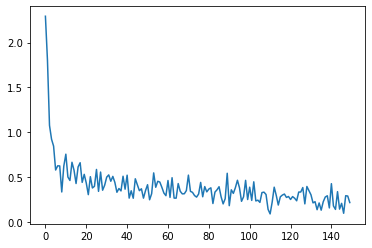

In [11]:
train_loss = []
for epoch in range(num_epoches):
    train(epoch)
    test()
plt.plot(train_loss)

In [12]:
net = MLPBatchNorm(in_dim, n_hidden_1, n_hidden_2, out_dim)
if torch.cuda.is_available():
    print('使用GPU')
    net = net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

使用GPU


training......
epoch: 0, batch: 0/938, loss: 2.46
epoch: 0, batch: 100/938, loss: 0.7566
epoch: 0, batch: 200/938, loss: 0.4122
epoch: 0, batch: 300/938, loss: 0.5201
epoch: 0, batch: 400/938, loss: 0.3306
epoch: 0, batch: 500/938, loss: 0.4044
epoch: 0, batch: 600/938, loss: 0.4789
epoch: 0, batch: 700/938, loss: 0.3994
epoch: 0, batch: 800/938, loss: 0.3098
epoch: 0, batch: 900/938, loss: 0.4194
testing......



Test Loss: 0.420537, Acc: 0.849600
training......
epoch: 1, batch: 0/938, loss: 0.4111
epoch: 1, batch: 100/938, loss: 0.5542
epoch: 1, batch: 200/938, loss: 0.2795
epoch: 1, batch: 300/938, loss: 0.3967
epoch: 1, batch: 400/938, loss: 0.47
epoch: 1, batch: 500/938, loss: 0.3654
epoch: 1, batch: 600/938, loss: 0.381
epoch: 1, batch: 700/938, loss: 0.449
epoch: 1, batch: 800/938, loss: 0.4726
epoch: 1, batch: 900/938, loss: 0.1923
testing......



Test Loss: 0.368640, Acc: 0.866100
training......
epoch: 2, batch: 0/938, loss: 0.3545
epoch: 2, batch: 100/938, loss: 0.4096
epoch: 2, batch: 200/938, loss: 0.3293
epoch: 2, batch: 300/938, loss: 0.2202
epoch: 2, batch: 400/938, loss: 0.216
epoch: 2, batch: 500/938, loss: 0.4209
epoch: 2, batch: 600/938, loss: 0.1841
epoch: 2, batch: 700/938, loss: 0.2289
epoch: 2, batch: 800/938, loss: 0.2663
epoch: 2, batch: 900/938, loss: 0.4726
testing......



Test Loss: 0.345681, Acc: 0.873200
training......
epoch: 3, batch: 0/938, loss: 0.2222
epoch: 3, batch: 100/938, loss: 0.4344
epoch: 3, batch: 200/938, loss: 0.3112
epoch: 3, batch: 300/938, loss: 0.2922
epoch: 3, batch: 400/938, loss: 0.275
epoch: 3, batch: 500/938, loss: 0.329
epoch: 3, batch: 600/938, loss: 0.285
epoch: 3, batch: 700/938, loss: 0.2383
epoch: 3, batch: 800/938, loss: 0.4497
epoch: 3, batch: 900/938, loss: 0.2192
testing......



Test Loss: 0.335672, Acc: 0.877200
training......
epoch: 4, batch: 0/938, loss: 0.2208
epoch: 4, batch: 100/938, loss: 0.2341
epoch: 4, batch: 200/938, loss: 0.2943
epoch: 4, batch: 300/938, loss: 0.2621
epoch: 4, batch: 400/938, loss: 0.3179
epoch: 4, batch: 500/938, loss: 0.2688
epoch: 4, batch: 600/938, loss: 0.3419
epoch: 4, batch: 700/938, loss: 0.2874
epoch: 4, batch: 800/938, loss: 0.2142
epoch: 4, batch: 900/938, loss: 0.1776
testing......



Test Loss: 0.336987, Acc: 0.877000
training......
epoch: 5, batch: 0/938, loss: 0.3819
epoch: 5, batch: 100/938, loss: 0.217
epoch: 5, batch: 200/938, loss: 0.1341
epoch: 5, batch: 300/938, loss: 0.2495
epoch: 5, batch: 400/938, loss: 0.2162
epoch: 5, batch: 500/938, loss: 0.2315
epoch: 5, batch: 600/938, loss: 0.157
epoch: 5, batch: 700/938, loss: 0.4335
epoch: 5, batch: 800/938, loss: 0.1364
epoch: 5, batch: 900/938, loss: 0.302
testing......



Test Loss: 0.329549, Acc: 0.881300
training......
epoch: 6, batch: 0/938, loss: 0.3141
epoch: 6, batch: 100/938, loss: 0.2784
epoch: 6, batch: 200/938, loss: 0.2414
epoch: 6, batch: 300/938, loss: 0.1831
epoch: 6, batch: 400/938, loss: 0.2021
epoch: 6, batch: 500/938, loss: 0.2008
epoch: 6, batch: 600/938, loss: 0.3927
epoch: 6, batch: 700/938, loss: 0.2596
epoch: 6, batch: 800/938, loss: 0.1909
epoch: 6, batch: 900/938, loss: 0.2422
testing......



Test Loss: 0.323551, Acc: 0.882500
training......
epoch: 7, batch: 0/938, loss: 0.1369
epoch: 7, batch: 100/938, loss: 0.2556
epoch: 7, batch: 200/938, loss: 0.1564
epoch: 7, batch: 300/938, loss: 0.1928
epoch: 7, batch: 400/938, loss: 0.1686
epoch: 7, batch: 500/938, loss: 0.1706
epoch: 7, batch: 600/938, loss: 0.3123
epoch: 7, batch: 700/938, loss: 0.2312
epoch: 7, batch: 800/938, loss: 0.2142
epoch: 7, batch: 900/938, loss: 0.2623
testing......



Test Loss: 0.353943, Acc: 0.873300
training......
epoch: 8, batch: 0/938, loss: 0.2199
epoch: 8, batch: 100/938, loss: 0.1338
epoch: 8, batch: 200/938, loss: 0.2167
epoch: 8, batch: 300/938, loss: 0.4217
epoch: 8, batch: 400/938, loss: 0.2663
epoch: 8, batch: 500/938, loss: 0.1588
epoch: 8, batch: 600/938, loss: 0.1679
epoch: 8, batch: 700/938, loss: 0.2002
epoch: 8, batch: 800/938, loss: 0.2525
epoch: 8, batch: 900/938, loss: 0.2528
testing......



Test Loss: 0.331921, Acc: 0.885300
training......
epoch: 9, batch: 0/938, loss: 0.1675
epoch: 9, batch: 100/938, loss: 0.2109
epoch: 9, batch: 200/938, loss: 0.204
epoch: 9, batch: 300/938, loss: 0.1546
epoch: 9, batch: 400/938, loss: 0.1964
epoch: 9, batch: 500/938, loss: 0.1838
epoch: 9, batch: 600/938, loss: 0.4496
epoch: 9, batch: 700/938, loss: 0.2168
epoch: 9, batch: 800/938, loss: 0.1147
epoch: 9, batch: 900/938, loss: 0.1348
testing......



Test Loss: 0.321056, Acc: 0.884600
training......
epoch: 10, batch: 0/938, loss: 0.1234
epoch: 10, batch: 100/938, loss: 0.3215
epoch: 10, batch: 200/938, loss: 0.09189
epoch: 10, batch: 300/938, loss: 0.3005
epoch: 10, batch: 400/938, loss: 0.1237
epoch: 10, batch: 500/938, loss: 0.2798
epoch: 10, batch: 600/938, loss: 0.1508
epoch: 10, batch: 700/938, loss: 0.2006
epoch: 10, batch: 800/938, loss: 0.2198
epoch: 10, batch: 900/938, loss: 0.1042
testing......



Test Loss: 0.326566, Acc: 0.886600
training......
epoch: 11, batch: 0/938, loss: 0.06031
epoch: 11, batch: 100/938, loss: 0.1103
epoch: 11, batch: 200/938, loss: 0.2899
epoch: 11, batch: 300/938, loss: 0.1933
epoch: 11, batch: 400/938, loss: 0.1516
epoch: 11, batch: 500/938, loss: 0.2406
epoch: 11, batch: 600/938, loss: 0.2111
epoch: 11, batch: 700/938, loss: 0.2662
epoch: 11, batch: 800/938, loss: 0.1397
epoch: 11, batch: 900/938, loss: 0.1091
testing......



Test Loss: 0.328896, Acc: 0.883600
training......
epoch: 12, batch: 0/938, loss: 0.1462
epoch: 12, batch: 100/938, loss: 0.2053
epoch: 12, batch: 200/938, loss: 0.2559
epoch: 12, batch: 300/938, loss: 0.1347
epoch: 12, batch: 400/938, loss: 0.121
epoch: 12, batch: 500/938, loss: 0.08672
epoch: 12, batch: 600/938, loss: 0.2857
epoch: 12, batch: 700/938, loss: 0.2395
epoch: 12, batch: 800/938, loss: 0.1577
epoch: 12, batch: 900/938, loss: 0.2164
testing......



Test Loss: 0.337414, Acc: 0.882900
training......
epoch: 13, batch: 0/938, loss: 0.2319
epoch: 13, batch: 100/938, loss: 0.1193
epoch: 13, batch: 200/938, loss: 0.329
epoch: 13, batch: 300/938, loss: 0.1459
epoch: 13, batch: 400/938, loss: 0.1559
epoch: 13, batch: 500/938, loss: 0.2528
epoch: 13, batch: 600/938, loss: 0.07355
epoch: 13, batch: 700/938, loss: 0.1222
epoch: 13, batch: 800/938, loss: 0.2392
epoch: 13, batch: 900/938, loss: 0.1357
testing......



Test Loss: 0.320553, Acc: 0.890700
training......
epoch: 14, batch: 0/938, loss: 0.2865
epoch: 14, batch: 100/938, loss: 0.1163
epoch: 14, batch: 200/938, loss: 0.1602
epoch: 14, batch: 300/938, loss: 0.1475
epoch: 14, batch: 400/938, loss: 0.2284
epoch: 14, batch: 500/938, loss: 0.1208
epoch: 14, batch: 600/938, loss: 0.1599
epoch: 14, batch: 700/938, loss: 0.08911
epoch: 14, batch: 800/938, loss: 0.08709
epoch: 14, batch: 900/938, loss: 0.2482
testing......



Test Loss: 0.352649, Acc: 0.883200


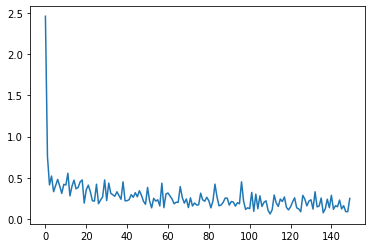

In [13]:
train_loss = []
for epoch in range(num_epoches):
    train(epoch)
    test()
plt.plot(train_loss)